In [458]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math as math
import pandas as pd

np.random.seed(10)

In [459]:
def readDataFile(filename):
    with open(filename, "r") as filestream1:
        array1 = []
        for line1 in filestream1:
            array1.append([float(x) for x in line1.split()][0])
        return array1

# Code to create the array for input data

In [460]:
array1 = np.asarray(readDataFile("data1.txt"))
array2 = np.asarray(readDataFile("data2.txt"))
array3 = np.asarray(readDataFile("data3.txt"))

# Density plot for inputdata1

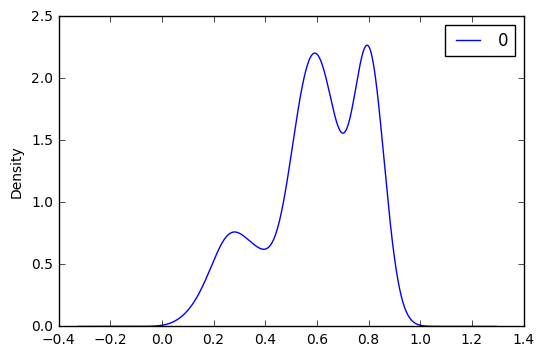

In [461]:
df1 = pd.DataFrame(array1)
df1.plot(kind='density')

# Density plot for inputdata2

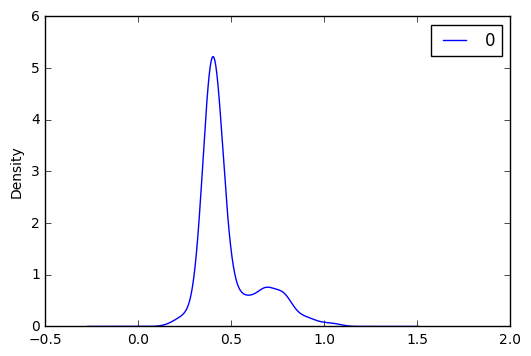

In [462]:
df2 = pd.DataFrame(array2)
df2.plot(kind='density')

# Density plot for inputdata3

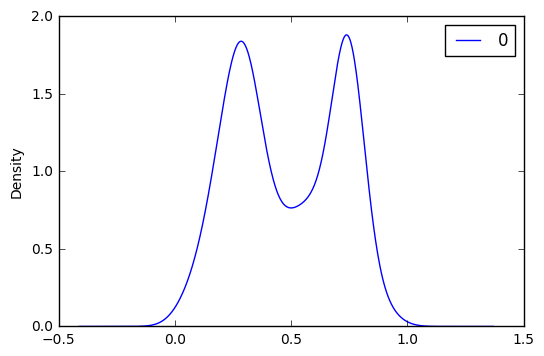

In [463]:
df3 = pd.DataFrame(array3)
df3.plot(kind='density')

# Initialization

In [464]:
mu = []
sd = []
weights = []
log_likelihoods = []

# EM algorithm

In [465]:
def cal_EM(dataFile, n, iterations):
    inputD = dataFile
    no_clus = n
    max_iter = iterations
    np.random.seed(10)
    
    #assign random mean to the clusters from the input data
    mu = array1[np.random.choice(len(inputD), no_clus)]

    #assign random standard deviation to the clusters from 5 to 25
    sd = np.random.uniform(4, 25, no_clus)

    #assign random weights or probabilities to the clusters. sum of weights = 1
    weights = np.repeat(1,no_clus) / float(no_clus)

    R = np.zeros((len(inputD), no_clus))

    log_likelihoods = []
        
    P = map(lambda x: (1/(np.sqrt(2 * math.pi * np.power(sd, 2)))*np.exp((-0.5)*np.power((x - mu), 2)/np.power(sd, 2))), inputD)
    P = np.asarray(P)

    while len(log_likelihoods) < max_iter:
        #E step
        for k in range(no_clus):
            R[:,k] = (weights[k] * P[:,k]) / np.sum(weights[:] * P[:,:], axis = 1)

        log_likelihood = np.sum(np.log(np.sum(weights[:] * P[:,:], axis = 1)))
        
        #Break condition for the loop
        len_logs = len(log_likelihoods)
        if (len_logs > 10):
            if( (log_likelihood - log_likelihoods[len_logs - 1]) < 0.00001 ):
                break
        
        log_likelihoods.append(log_likelihood)

        #M step
        for k in range(no_clus):
            mu[k] = (sum(inputD[:] * R[:,k])) / (sum(R[:,k]))
            sd[k] = np.sqrt( sum(R[:,k] * np.power(inputD[:], 2)) / float(sum(R[:,k])) -  np.power(mu[k], 2) )
            weights[k] = (sum(R[:,k])) / len(inputD)

            P = map(lambda x: (1/(np.sqrt(2*math.pi*np.power(sd, 2)))*np.exp((-0.5)*np.power((x-mu),2)/np.power(sd, 2))), inputD)
            P = np.asarray(P)
        
    return mu, sd, weights, log_likelihoods

# EM Algorithm run #1 for data1 and 3 Gaussians

In [466]:
mu, sd, weights, log_likelihoods = cal_EM(array1, 3, 500)

In [467]:
print "mu =", mu, "\nsd = ", sd, "\nweights = ", weights
print "log_likelihood = ", log_likelihoods [-1], "\nIterations = ", len(log_likelihoods)

mu = [ 0.59165683  0.80054076  0.29013447] 
sd =  [ 0.06772417  0.02634699  0.08437158] 
weights =  [ 0.48280203  0.32301644  0.19418153]
log_likelihood =  284.994664737 
Iterations =  77


# log likelihood vs number of iterations (for data1 and 3 Gaussians)

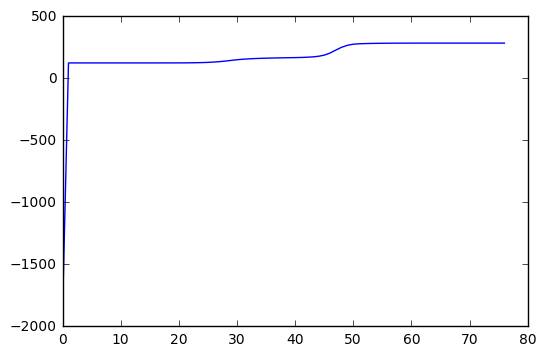

In [468]:
plt.plot(log_likelihoods)

# log likelihood vs number of iterations (for data1 and 2 Gaussians)

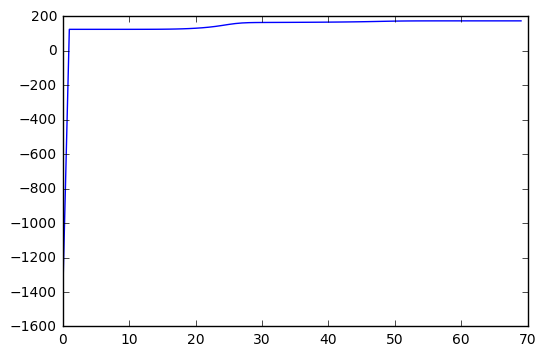

In [469]:
mu, sd, weights, log_likelihoods = cal_EM(array1, 2, 500)
plt.plot(log_likelihoods)

In [470]:
print "mu =", mu, "\nsd = ", sd, "\nweights = ", weights
print "log_likelihood = ", log_likelihoods [-1], "\nIterations = ", len(log_likelihoods)

mu = [ 0.666676   0.2738658] 
sd =  [ 0.12468614  0.07569908] 
weights =  [ 0.83173477  0.16826523]
log_likelihood =  174.318602943 
Iterations =  70


# log likelihood vs number of iterations (for data1 and 4 Gaussians)

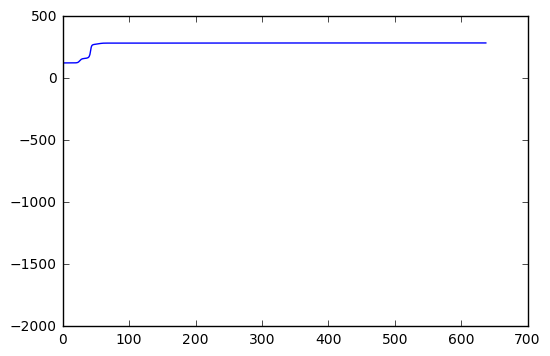

In [471]:
mu, sd, weights, log_likelihoods = cal_EM(array1, 4, 1000)
plt.plot(log_likelihoods)

In [472]:
print "mu =", mu, "\nsd = ", sd, "\nweights = ", weights
print "log_likelihood = ", log_likelihoods [-1], "\nIterations = ", len(log_likelihoods)

mu = [ 0.799716    0.62469963  0.53506499  0.30075265] 
sd =  [ 0.02704449  0.04862982  0.03391728  0.09152716] 
weights =  [ 0.32917227  0.30246837  0.16046288  0.20789647]
log_likelihood =  286.301061184 
Iterations =  638


# EM Algorithm for data1 and 1-10 Gaussians

In [473]:
log_likelihoods1 = []
for i in range(10):
    new_mu, new_sd, new_weights, new_log_likelihoods = cal_EM(array1, i+1, 500)
    len_logs = len(log_likelihoods1)
    if (len_logs >= 1):
        if(math.fabs(new_log_likelihoods[-1] - log_likelihoods[-1]) < 1.5 or (new_log_likelihoods[-1] < log_likelihoods[-1])):
            break
    log_likelihoods1.append(new_log_likelihoods[-1])
    mu, sd, weights, log_likelihoods = new_mu, new_sd, new_weights, new_log_likelihoods

log likelihood values for data1 and 1-10 Gaussians

In [474]:
log_likelihoods1

[125.16052260663457, 174.3186029429198, 284.99466473713022]

log likelihood vs number of Gaussians (for data1)

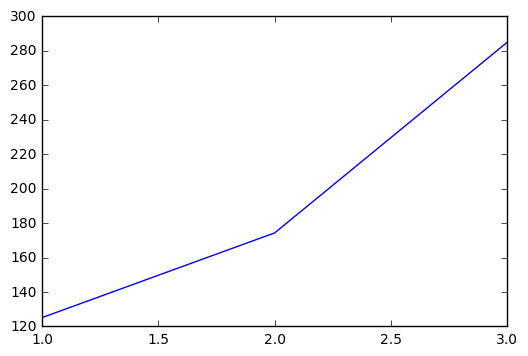

In [475]:
x = len(log_likelihoods1)
plt.plot(np.linspace(1,x,x), log_likelihoods1)

parameters of the model for data1

In [476]:
print "mu =", mu, "\nsd = ", sd, "\nweights = ", weights
print "log_likelihood = ", log_likelihoods [-1], "\nIterations = ", len(log_likelihoods)

mu = [ 0.59165683  0.80054076  0.29013447] 
sd =  [ 0.06772417  0.02634699  0.08437158] 
weights =  [ 0.48280203  0.32301644  0.19418153]
log_likelihood =  284.994664737 
Iterations =  77


# EM Algorithm for data2 and 1-10 Gaussians

In [477]:
log_likelihoods2 = []
for i in range(10):
    new_mu, new_sd, new_weights, new_log_likelihoods = cal_EM(array2, i+1, 600)
    len_logs = len(log_likelihoods2)
    if (len_logs >= 1):
        if(math.fabs(new_log_likelihoods[-1] - log_likelihoods[-1]) < 0.1 or (new_log_likelihoods[-1] < log_likelihoods[-1])):
            break
    log_likelihoods2.append(new_log_likelihoods[-1])
    mu, sd, weights, log_likelihoods = new_mu, new_sd, new_weights, new_log_likelihoods

log likelihood values for data2 and 1-10 Gaussians

In [478]:
log_likelihoods2

[233.7203077311367,
 491.94872639290878,
 494.78424914594854,
 496.14041373475243,
 497.58331518722696,
 500.54429469574279]

parameters of the model for data2

In [479]:
print "mu =", mu, "\nsd = ", sd, "\nweights = ", weights
print "log_likelihood = ", log_likelihoods [-1], "\nIterations = ", len(log_likelihoods)

mu = [ 0.94380621  0.73908419  0.43044603  0.39030292  0.25240658  0.54166664] 
sd =  [ 0.07460636  0.06990841  0.0259898   0.02506817  0.04189049  0.10420733] 
weights =  [ 0.02329887  0.13173508  0.18921977  0.48170043  0.02727987  0.14676599]
log_likelihood =  500.544294696 
Iterations =  600


log likelihood vs number of Gaussians (for data2)

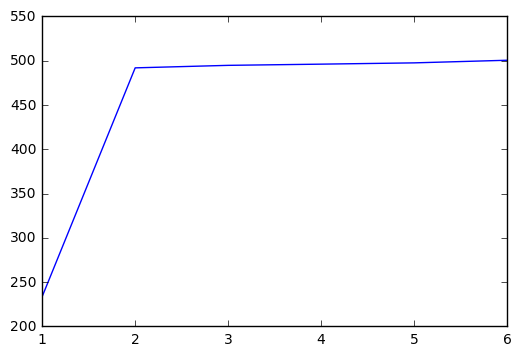

In [480]:
x = len(log_likelihoods2)
plt.plot(np.linspace(1,x,x), log_likelihoods2)

# EM Algorithm for data3 and 1-10 Gaussians

In [481]:
log_likelihoods3 = []
for i in range(10):
    new_mu, new_sd, new_weights, new_log_likelihoods = cal_EM(array3, i+1, 500)
    len_logs = len(log_likelihoods3)
    if (len_logs >= 1):
        if(math.fabs(new_log_likelihoods[-1] - log_likelihoods[-1]) < 0.1 or (new_log_likelihoods[-1] < log_likelihoods[-1])):
            break
    log_likelihoods3.append(new_log_likelihoods[-1])
    mu, sd, weights, log_likelihoods = new_mu, new_sd, new_weights, new_log_likelihoods

log likelihood values for data3 and 1-10 Gaussians

In [482]:
log_likelihoods3

[25.072651864258628]

parameters of the model for data3

In [483]:
print "mu =", mu, "\nsd = ", sd, "\nweights = ", weights
print "log_likelihood = ", log_likelihoods [-1], "\nIterations = ", len(log_likelihoods)

mu = [ 0.4812777] 
sd =  [ 0.23013623] 
weights =  [ 1.]
log_likelihood =  25.0726518643 
Iterations =  11


log likelihood vs number of Gaussians (for data3)

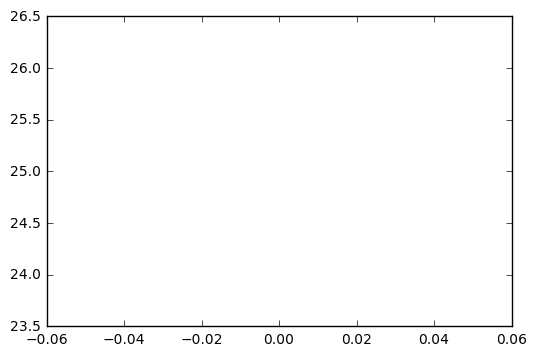

In [484]:
plt.plot(log_likelihoods3)